In [2]:
import os
import pandas as pd
from tflearn.datasets import imdb
import seaborn as sns
import matplotlib as mpl
import pickle as pkl
import torch

In [3]:
from cell import utils, plot_utils

In [4]:
model_dir = "/Users/fahimehb/Documents/git-workspace/celltypes/cell/DMGI/saved_model"
data_dir = "/Users/fahimehb/Documents/git-workspace/celltypes/cell/DMGI/data/"

In [4]:
input_data = pd.read_pickle(os.path.join(data_dir, "imdb.pkl"))

### Movie-actor relations

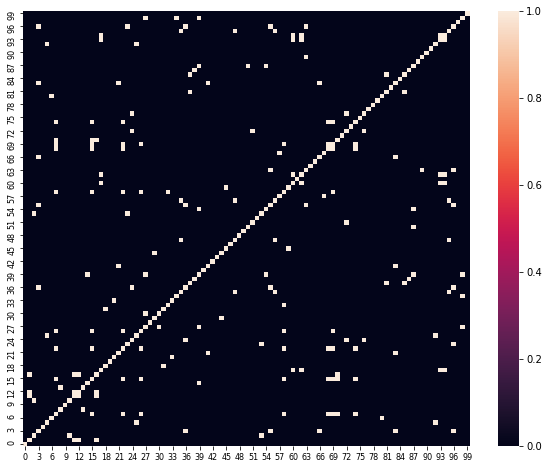

In [210]:
fig = plt.figure(figsize=(10,8))
ax = sns.heatmap(input_data['MAM'][0:100,0:100])
ax.tick_params(labelsize=8)
ax.invert_yaxis()

There are 3550 movies. The marix is 3550 by 3550. 

In [140]:
input_data['MAM'].shape

(3550, 3550)

All the diagonal values are equal to one

In [144]:
sum(input_data['MAM'].diagonal())==input_data['MAM'].shape[0]

True

And the matrix is symmetric :

In [145]:
sum(sum(input_data['MAM'].T == input_data['MAM']))==input_data['MAM'].shape[0]*input_data['MAM'].shape[1]

True

### Movie-Director relation

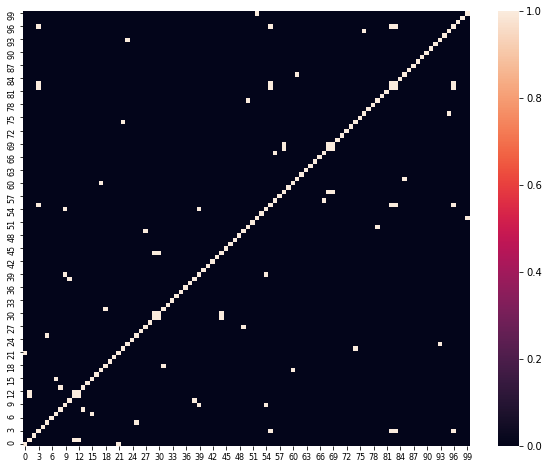

In [212]:
fig = plt.figure(figsize=(10,8))
ax = sns.heatmap(input_data['MDM'][0:100,0:100])
ax.tick_params(labelsize=8)
ax.invert_yaxis()

There are 3 different classes for the movies and the overall idea is to find a consensus embedding that can represent this classes

In [149]:
input_data['label'].shape

(3550, 3)

In [154]:
# Each movie has only one label
sum(sum(input_data['label']==1))

3550

In [175]:
#lets assign a color to each movie 
df = pd.DataFrame(input_data['label'], columns=["Action", "Comedy", "Drama"])
color = []
for idx, r in df.iterrows():
    if r['Action']==1:
        color.append("red")
    elif r["Comedy"]==1:
        color.append("green")
    elif r["Drama"]==1:
        color.append("blue")
df['color'] = color
df

,Action,Comedy,Drama,color
0,0.0,1.0,0.0,green
1,0.0,1.0,0.0,green
2,0.0,1.0,0.0,green
3,0.0,1.0,0.0,green
4,0.0,1.0,0.0,green
...,...,...,...,...
3545,0.0,0.0,1.0,blue
3546,0.0,0.0,1.0,blue
3547,0.0,0.0,1.0,blue
3548,0.0,1.0,0.0,green


### After training in 64 dim

In [184]:
model_output = torch.load(os.path.join(model_dir, "best_imdb_DMGI_MAM,MDM.pkl"))

In [185]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2 , random_state=42)
emb_2d = tsne.fit_transform(model_output['H'].detach().numpy()[0])
plt.scatter(emb_2d[:,0], emb_2d[:,1], c=color, s=5)

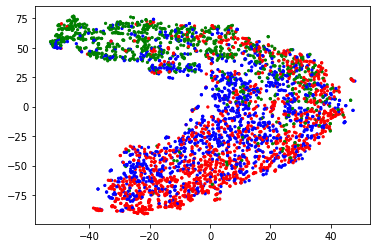

before training :

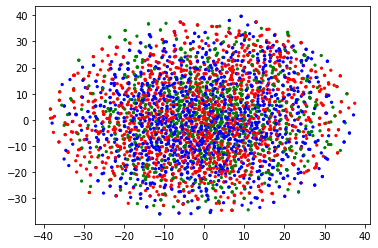

In [183]:
plt.scatter(emb_2d[:,0], emb_2d[:,1], c=color, s=5)

### After training in 2 dim

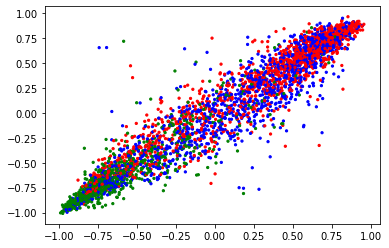

In [187]:
model_output = torch.load(os.path.join(model_dir, "best_imdb_DMGI_MAM,MDM.pkl"))
emb_2d = model_output['H'].detach().numpy()[0]
plt.scatter(emb_2d[:,0], emb_2d[:,1], c=color, s=5)

### After training in 3 dim

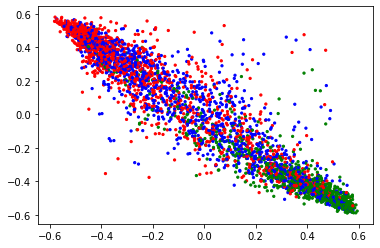

In [192]:
model_output = torch.load(os.path.join(model_dir, "best_imdb_DMGI_MAM,MDM.pkl"))
emb_2d = model_output['H'].detach().numpy()[0]
plt.scatter(emb_2d[:,0], emb_2d[:,1], c=color, s=5)

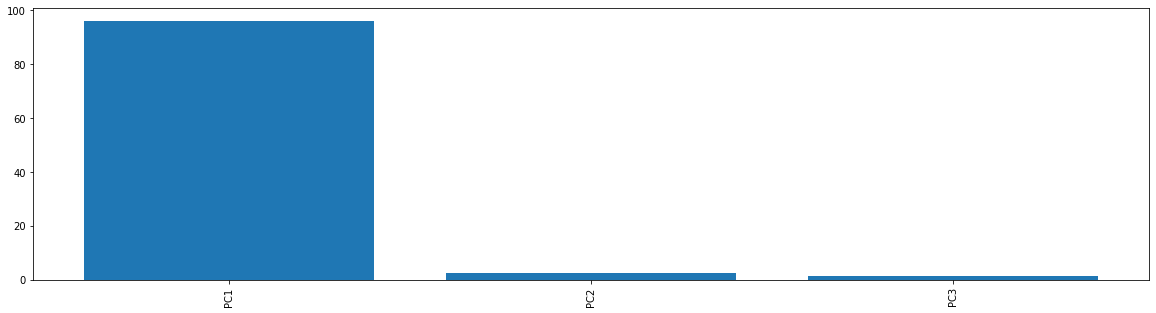

In [193]:

from sklearn.decomposition import PCA
from sklearn import preprocessing

vectors = model_output['H'].detach().numpy()[0]

pca = PCA(n_components=3)
pca.fit(vectors)
pca_data = pca.transform(vectors)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(20,5))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label= labels)
plt.xticks(rotation = 90)
plt.show()

### After training in 10 dim

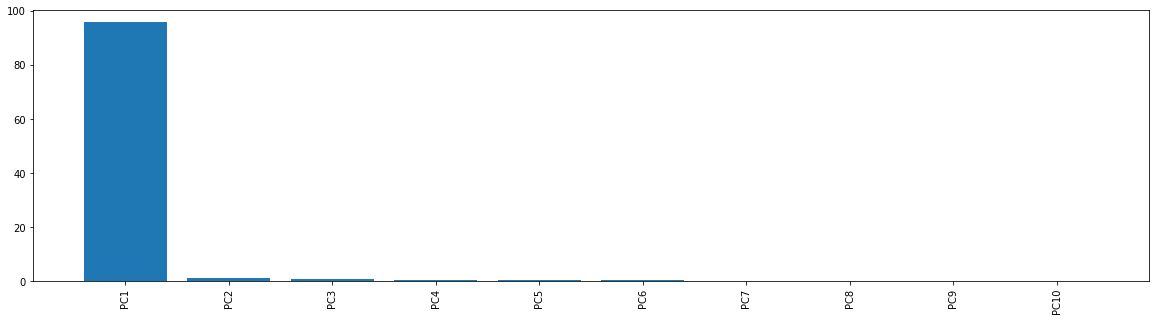

In [203]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

model_output = torch.load(os.path.join(model_dir, "best_imdb_DMGI_MAM,MDM.pkl"))

vectors = model_output['H'].detach().numpy()[0]

pca = PCA(n_components=10)
pca.fit(vectors)
pca_data = pca.transform(vectors)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(20,5))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label= labels)
plt.xticks(rotation = 90)
plt.show()

### For symmetric random networks like the one below 

In [223]:
N = 3550
b = np.random.uniform(low=0,high=1,size=(N,N))
b_symm = (b + b.T)/2

In [225]:
b_symm

array([[0.61692219, 0.27348273, 0.27118793, ..., 0.44469096, 0.6059713 ,
        0.64604749],
       [0.27348273, 0.52897596, 0.35736393, ..., 0.32402491, 0.49447416,
        0.43745557],
       [0.27118793, 0.35736393, 0.53378934, ..., 0.67260747, 0.91680441,
        0.63378128],
       ...,
       [0.44469096, 0.32402491, 0.67260747, ..., 0.55753237, 0.40457521,
        0.40411673],
       [0.6059713 , 0.49447416, 0.91680441, ..., 0.40457521, 0.26853895,
        0.76558357],
       [0.64604749, 0.43745557, 0.63378128, ..., 0.40411673, 0.76558357,
        0.95016268]])

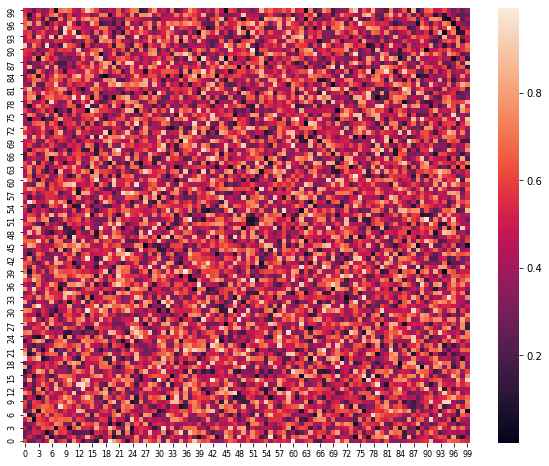

In [226]:
fig = plt.figure(figsize=(10,8))
ax = sns.heatmap(b_symm[0:100,0:100])
ax.tick_params(labelsize=8)
ax.invert_yaxis()

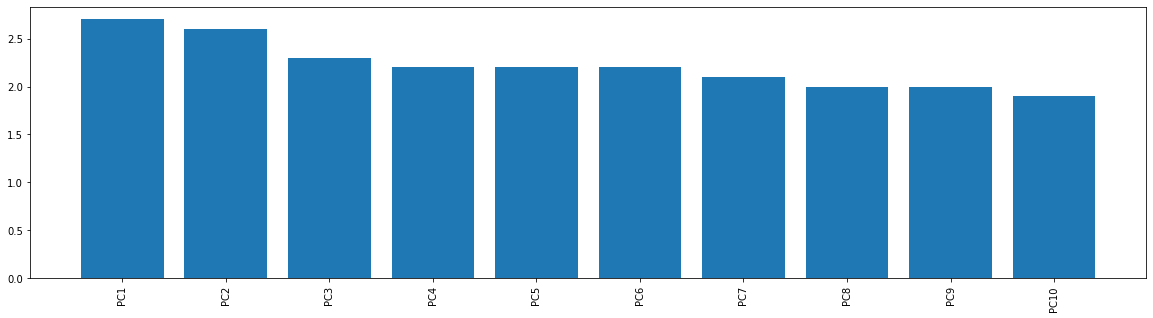

In [255]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

model_output = torch.load(os.path.join(model_dir, "best_imdb_DMGI_MAM,MDM.pkl"))

vectors = model_output['H'].detach().numpy()[0]

pca = PCA(n_components=10)
pca.fit(vectors)
pca_data = pca.transform(vectors)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(20,5))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label= labels)
plt.xticks(rotation = 90)
plt.show()

### ACM data

In [13]:
import scipy.io as sio
acm_data = sio.loadmat(os.path.join(data_dir, "acm.mat"))

In [16]:
acm_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'PTP', 'PLP', 'PAP', 'feature', 'label', 'train_idx', 'val_idx', 'test_idx'])

In [38]:
df = pd.DataFrame(acm_data['label'], columns=["t1", "t2", "t3"])
color = []
for idx, r in df.iterrows():
    if r['t1']==1:
        color.append("red")
    elif r["t2"]==1:
        color.append("green")
    elif r["t3"]==1:
        color.append("blue")
df['color'] = color
df

,t1,t2,t3,color
0,1.0,0.0,0.0,red
1,1.0,0.0,0.0,red
2,1.0,0.0,0.0,red
3,1.0,0.0,0.0,red
4,1.0,0.0,0.0,red
...,...,...,...,...
3020,0.0,0.0,1.0,blue
3021,0.0,0.0,1.0,blue
3022,0.0,0.0,1.0,blue
3023,0.0,0.0,1.0,blue


Are the relation type matrices symmetric?

In [21]:
print(sum(sum(acm_data['PLP'].T == acm_data['PLP']))==acm_data['PLP'].shape[0]*acm_data['PLP'].shape[1])
print(sum(sum(acm_data['PTP'].T == acm_data['PTP']))==acm_data['PTP'].shape[0]*acm_data['PTP'].shape[1])
print(sum(sum(acm_data['PAP'].T == acm_data['PAP']))==acm_data['PAP'].shape[0]*acm_data['PAP'].shape[1])

True
True
True


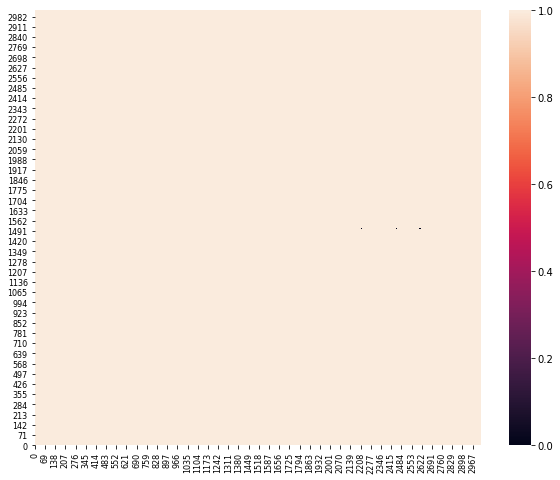

In [30]:
fig = plt.figure(figsize=(10,8))
ax = sns.heatmap(acm_data["PTP"])
ax.tick_params(labelsize=8)
ax.invert_yaxis()

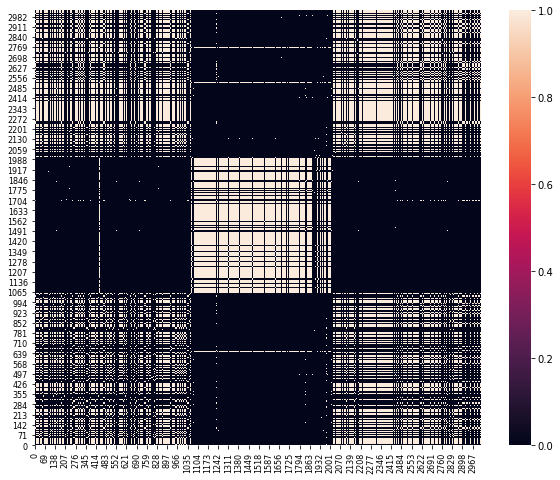

In [31]:
fig = plt.figure(figsize=(10,8))
ax = sns.heatmap(acm_data["PLP"])
ax.tick_params(labelsize=8)
ax.invert_yaxis()

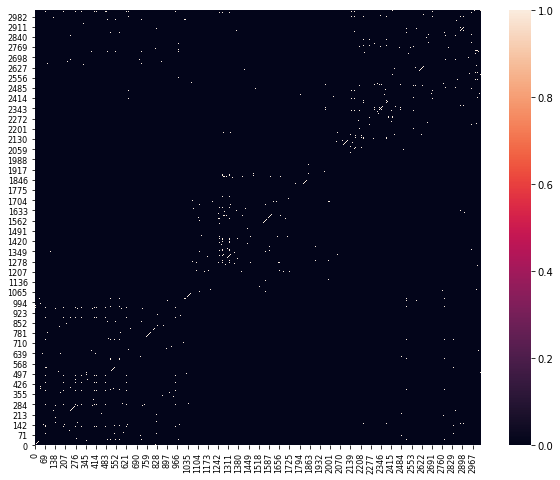

In [32]:
fig = plt.figure(figsize=(10,8))
ax = sns.heatmap(acm_data["PAP"])
ax.tick_params(labelsize=8)
ax.invert_yaxis()

### in 64dim

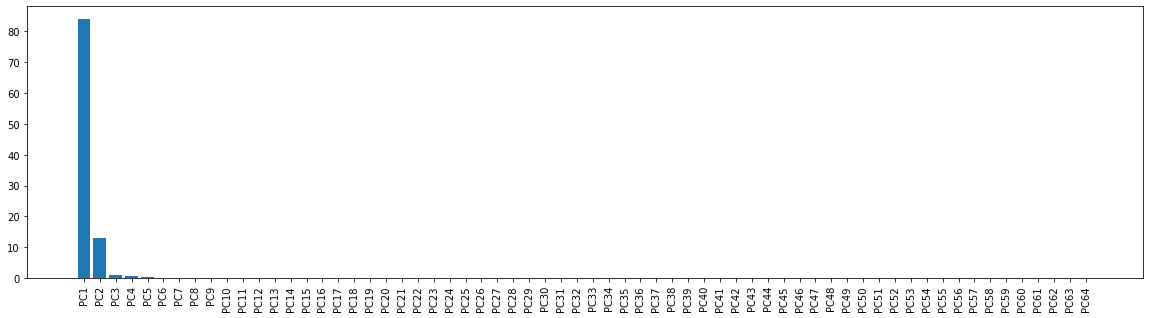

In [58]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

model_output = torch.load(os.path.join(model_dir, "64d_best_acm_DMGI_PAP,PLP.pkl"))

vectors = model_output['H'].detach().numpy()[0]

pca = PCA(n_components=64)
pca.fit(vectors)
pca_data = pca.transform(vectors)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(20,5))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label= labels)
plt.xticks(rotation = 90)
plt.show()

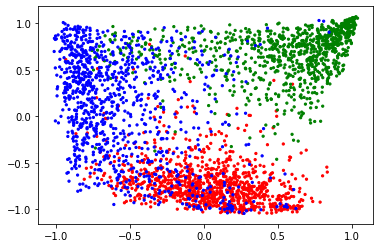

In [59]:
model_output = torch.load(os.path.join(model_dir, "64d_best_acm_DMGI_PAP,PLP.pkl"))
emb_2d = model_output['H'].detach().numpy()[0]
plt.scatter(emb_2d[:,0], emb_2d[:,1], s=5, c=color)

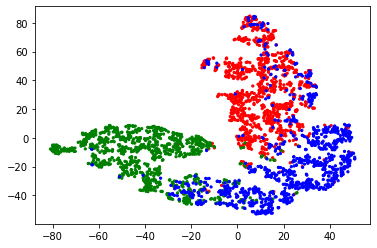

In [60]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2 , random_state=42)
emb_2d = tsne.fit_transform(model_output['H'].detach().numpy()[0])
plt.scatter(emb_2d[:,0], emb_2d[:,1], c=color, s=5)

### in 10 dim

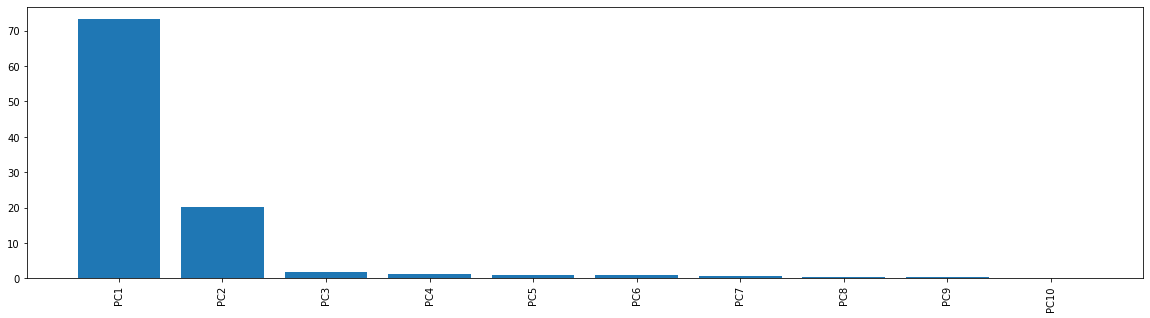

In [82]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

model_output = torch.load(os.path.join(model_dir, "best_acm_DMGI_PAP,PLP.pkl"))

vectors = model_output['H'].detach().numpy()[0]

pca = PCA(n_components=10)
pca.fit(vectors)
pca_data = pca.transform(vectors)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(20,5))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label= labels)
plt.xticks(rotation = 90)
plt.show()

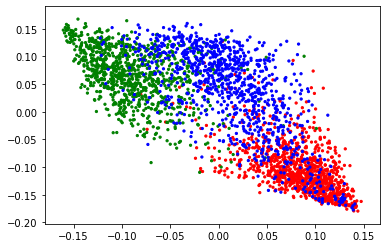

In [83]:
model_output = torch.load(os.path.join(model_dir, "best_acm_DMGI_PAP,PLP.pkl"))
emb_2d = model_output['H'].detach().numpy()[0]
plt.scatter(emb_2d[:,0], emb_2d[:,1], s=5, c=color)

### in 3d

/Users/fahimehb/anaconda3/envs/py374/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


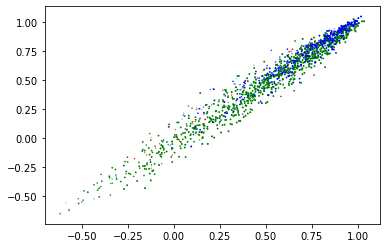

In [88]:
model_output = torch.load(os.path.join(model_dir, "3d_best_acm_DMGI_PAP,PLP.pkl"))
emb_2d = model_output['H'].detach().numpy()[0]
plt.scatter(emb_2d[:,0], emb_2d[:,1], emb_2d[:,2], c=color)

In [101]:
data = pd.DataFrame(emb_2d, columns=["Z1", "Z2", "Z0"])
data['cluster_color']=color

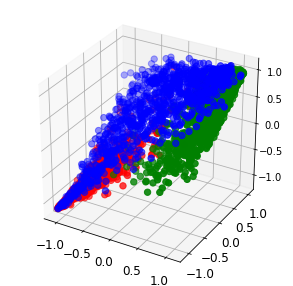

In [102]:
fig = plot_utils.plot_embedding(data=data, plot_dim=3, plot_size=(5,5))

### What if I set all features to zero

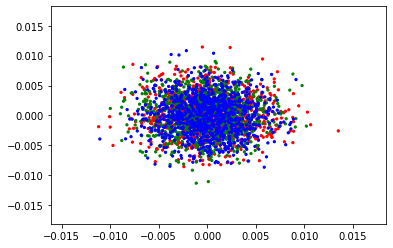

In [104]:
model_output = torch.load(os.path.join(model_dir, "best_acm_DMGI_PAP,PLP.pkl"))
emb_2d = model_output['H'].detach().numpy()[0]
plt.scatter(emb_2d[:,0], emb_2d[:,1], s=5, c=color)